# 신경망 학습

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 오차제곱합

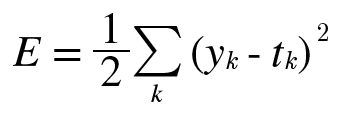

In [3]:
from IPython.display import Image
Image('./deep_learning_images/e 4.1.png', width=200)

## 교차 엔트로피

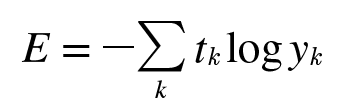

In [4]:
Image('./deep_learning_images/e 4.2.png', width=200)

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 0.0000001
    return -np.sum(t * np.log(y + delta))

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  # 정답: 2 (one-hot encoding)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  # 예측: 2에 60%의 확률로 예측
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  # 정답: 2 (one-hot encoding)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  # 예측: 2에 60%의 확률로 예측
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

**예측을 잘못할수록 cross entropy의 값이 커지는 것을 알 수 있다.**

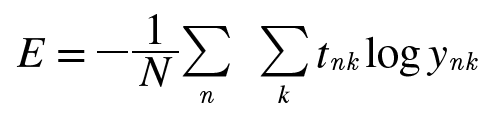

In [16]:
Image('./deep_learning_images/e 4.3.png', width=200)

In [11]:
# 배치용 크로스 엔트로피 함수

def cross_entropy_error(y, t):
    delta = 1e-7 # 0.0000001
    
    if y.ndim == 1:  # 배치 단위가 아니라 1차원으로 입력되었을 경우
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    return -np.sum(t * np.log(y + delta)) / batch_size

In [12]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 미분

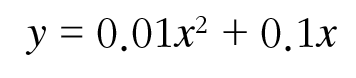

In [13]:
Image('./deep_learning_images/e 4.5.png', width=200)

In [13]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

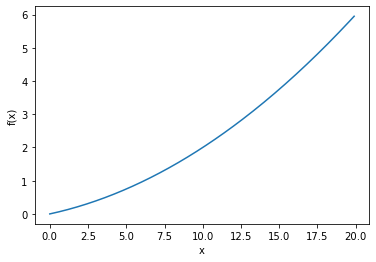

In [14]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)

In [15]:
# 중앙차분에 의한 수치미분
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / 2 * h

In [16]:
numerical_diff(function_1, 5)

1.9999999999908982e-09

## 편미분

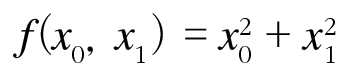

In [18]:
Image('./deep_learning_images/e 4.6.png', width=200)

In [17]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [18]:
# 그레디언트 (편미분 벡터)
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grads = np.zeros_like(x)
    
    for idx in range(x.size):   # x[0], x[1], ....
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)   # f(x+h)
        x[idx] = tmp_val - h
        fxh2 = f(x)   # f(x-h)
        
        grads[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        
    return grads

In [19]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

## 경사하강법

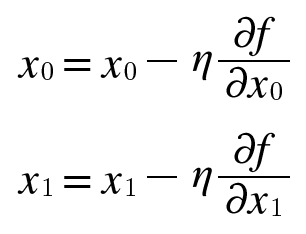

In [53]:
Image('./deep_learning_images/e 4.7.png', width=150)

In [21]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)  # gradient
        x = x - (lr * grad)
        
    return x

In [ ]:
# init_x: 초기 랜덤한 weight vector (W1, W2, ...)
# function_2: loss function (손실함수)
# gradient_descent: weight의 기울기(미분)를 단서로 loss의 최솟값을 찾아가는 과정 (경사 하강법)

In [25]:
init_x = np.array([-1.0, 4.0])  # 랜덤하게 시작
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([-2.03703598e-10,  8.14814391e-10])

## 신경망에서의 기울기

- (참고) np.nditer 사용법

In [34]:
import numpy as np
x=np.array([[1,2,3],[4,5,6]])
it=np.nditer(x,flags=['multi_index'],op_flags=['readwrite'])
while not it.finished:
    print(it.multi_index) #(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)
    print(x[it.multi_index]) # 1,2,3,4,5,6
    it.iternext()

(0, 0)
1
(0, 1)
2
(0, 2)
3
(1, 0)
4
(1, 1)
5
(1, 2)
6


In [35]:
# 신경망에서 사용할 W(Matrix 형태)의 편미분 행렬을 구하는 함수
# 그레디언트 (편미분 벡터)

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grads = np.zeros_like(x)
    
    it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"])
        
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
    
        grads[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()
        
    return grads

In [36]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [37]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [39]:
x = np.array([0.6, 0.9])  # (2, )
t = np.array([0, 0, 1])  # (3, )

net = simpleNet()
f = lambda w: net.loss(x, t)  # f: Loss function

dW = numerical_gradient(f, net.W)

In [40]:
dW # net.W를 미분한 기울기 벡터

array([[ 0.11412845,  0.15547512, -0.26960357],
       [ 0.17119268,  0.23321268, -0.40440535]])